In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(font="Verdana")
sns.set_style("white")

In [3]:
from etherscan import Etherscan
from dotenv import load_dotenv
import os
load_dotenv()
API_key=os.environ["API_key"]
eth = Etherscan(API_key)

In [4]:
df=pd.read_csv("ethereum mining data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200274 entries, 0 to 200273
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   block_number  200274 non-null  int64 
 1   timestamp     200274 non-null  int64 
 2   block_miner   200274 non-null  object
 3   block_reward  200274 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.6+ MB


In [6]:
df["timestamp"]=df["timestamp"].astype(int).apply(lambda x: pd.Timestamp(x,unit="s"))

In [7]:
df["block_reward"]=df["block_reward"].astype(float)/1000000000000000000

In [8]:
df["day"]=df["timestamp"].apply(lambda x: x.day)

In [9]:
df.groupby("day")["block_number"].count().mean()

6460.451612903225

In [10]:
df["block_miner"].nunique()

89

In [11]:
df.groupby("block_miner")["block_number"].count().describe()

count       89.000000
mean      2250.269663
std       6951.164346
min          1.000000
25%          3.000000
50%         45.000000
75%        971.000000
max      48432.000000
Name: block_number, dtype: float64

In [12]:
top_5_pools=((df.groupby("block_miner")["block_number"].count().sort_values(ascending=False)/
              df["block_number"].count()).iloc[:5]).sum()
print(f"The top five pools mined {round(top_5_pools*100)}% of the total blocks in May")

The top five pools mined 61% of the total blocks in May


In [13]:
total_reward= df["block_reward"].sum()
eth_price=float(eth.get_eth_last_price()["ethusd"])
print(f"The total block rewards were {total_reward:,} ETH, which currently are worth ${round(total_reward*eth_price):,} USD")

The total block rewards were 711,014.6061276206 ETH, which currently are worth $2,296,790,482 USD


In [14]:
df["block_reward"].describe()

count    200274.000000
mean          3.550209
std           1.906416
min           2.000000
25%           2.624361
50%           2.994735
75%           3.784293
max         175.276604
Name: block_reward, dtype: float64

In [15]:
rewards=(df.groupby("block_miner")["block_reward"].sum().sort_values(ascending=False).iloc[:5]).sort_values()
rewards.index=["Hiveon Pool","zhizhu.top","F2Pool","Ethermine","Spark Pool"]
top_5_rewards=rewards.values*eth_price


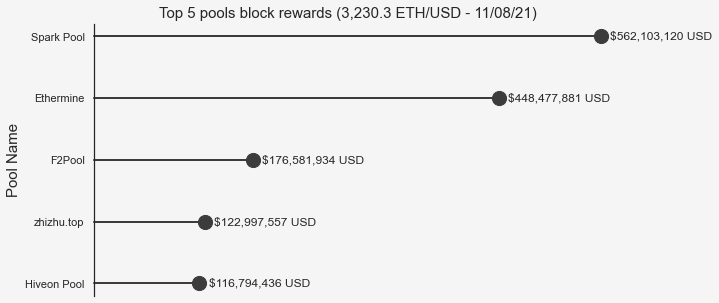

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(top_5_rewards,np.arange(5),s=200,c="#3c3c3d")
for i in range(5):
    ax.plot([0, top_5_rewards[i]], [i, i], lw=2,color="#3c3c3d")
fmt = '${x:,.0f}'
plt.xticks([])
plt.yticks(np.arange(0,5,1), labels=rewards.index,fontsize=12)
for i in range(5):
    plt.text(top_5_rewards[i]+10000000,i-0.05,f"${round(top_5_rewards[i]):,} USD",size=12)
sns.despine(bottom=True)
ax.spines["left"].set_position('zero')
ax.set_ylabel("Pool Name",size=15)
date=datetime.now().strftime("%d/%m/%y")
ax.set_title(f"Top 5 pools block rewards ({eth_price:,} ETH/USD - {date})",size=15)
ax.set_facecolor('#f5f5f5')
fig.set_facecolor("#f5f5f5")

In [17]:
prices=pd.read_csv("ETH-USD.csv")

In [18]:
prices["volatility"]=round(((prices["High"]-prices["Low"])/prices["Low"])*100,2)

In [19]:
daily_rewards=df.groupby("day")["block_reward"].sum().values
volatility=prices["volatility"].values

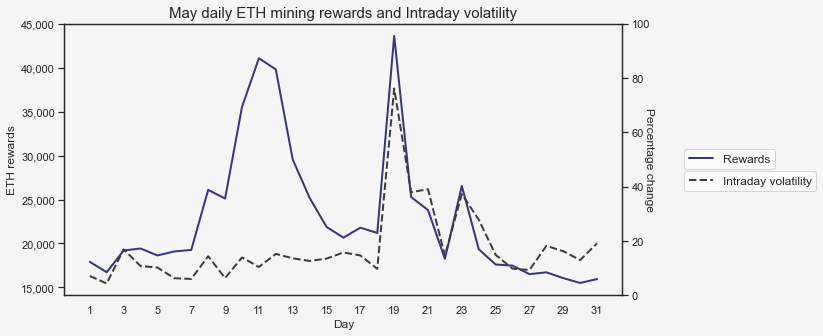

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.arange(1,32), daily_rewards,lw=2,color="#37367b",label="Rewards")
ax2 = ax.twinx()
ax2.plot(np.arange(1,32), volatility, ls="--",lw=2,color="#3c3c3d",label="Intraday volatility")
ax2.set_ylim([0, 100])
plt.xticks(np.arange(1,32,2))
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel("Day",size=12)
ax.set_ylabel("ETH rewards",size=12)
ax2.set_ylabel("Percentage change",size=12,rotation=270)
ax.set_title("May daily ETH mining rewards and Intraday volatility",size=15)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),fontsize=12)
ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.42),fontsize=12)
ax.set_facecolor('#f5f5f5')
fig.set_facecolor("#f5f5f5")

In [21]:
corr=np.corrcoef(daily_rewards, volatility)[0,1]
print(f"The Pearson correlation between the block rewards and the intraday volatility is {round(corr,2)}")

The Pearson correlation between the block rewards and the intraday volatility is 0.46
